In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
df=pd.read_csv('soft_pf0.1_sp100_lp100_reduced10_filament.orientation_corr',skiprows=1,delim_whitespace=True)

In [40]:
df['orientation_corr_var'] = df['orientation_corr_sem'].apply(lambda y: y**2)

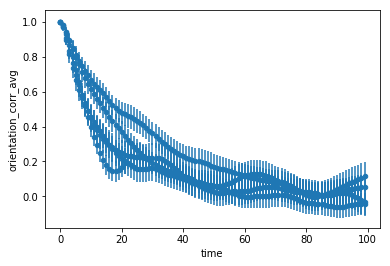

In [28]:
df.plot(x='time',y='orientation_corr_avg',yerr='orientation_corr_sem',kind='scatter')

In [41]:
gb=df.groupby('time')

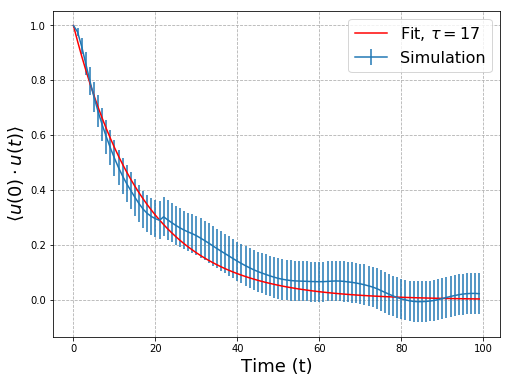

In [77]:
tau=17
x=df.time.unique()
y=gb.orientation_corr_avg.mean()
ysem=gb.orientation_corr_var.mean().apply(lambda y: np.sqrt(y))
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.errorbar(x,y,yerr=ysem)
theory = lambda t: np.exp(-t/tau)
ax.plot(x,theory(x),'r')
ax.set_ylabel(r"$\langle u(0)\cdot u(t)\rangle$",fontsize=18)
ax.set_xlabel("Time (t)",fontsize=18)
ax.legend([r"Fit, $\tau=%2.0f$" % tau,'Simulation'],fontsize=16)
ax.grid(True,linestyle='--')